# Assignment2
Merwan, Chaoui Boudghen
Student number : **041124927**

## description


In this assignment, I'll be scraping the titles and download numbers of the books available in the bookshelf "Computers and Technology" from the well-known **Gutenberg Open Library**. The content of the library is publicly available.

url : https://gutenberg.org/

## Ethical Considerations of Web Scraping




Web scraping can be described as a way to automatically extract information from web sites, and while this can be useful, it must be done responsibly to avoid causing harm. There are three key aspects we need to talk about here:

1. **Respecting "robots.txt":** : Almost all site admins include a file called robots.txt in their root folder, where they tell web scrapers what is and isn't allowed on their sites. Ethical scraping means that you should thoroughly respect what's written in this robots.txt. Ignoring it can be seen as something very bad, causing some legal problems, or at least IP bans, as some sites do.

2. **Rate Limiting Requests:** Even if a site allows scraping data, that doesn't mean it should be done without control, as too many requests in a short period of time can lead to server overload. This could bring the site down, or at least slow it down, making it less responsive to other "real" users. To avoid this, web scrapers should always include some form of delay between requests or include a limit on how many requests should be sent at once. this ensures that the website remains functional for everyone.

3. **Handle user data responsibly:** Scraping data that contains information about people should be handled very carefully. Privacy laws protect user data, and breaking these laws can lead to serious problems. Any personal or sensitive information about people should be collected with permission. Even public data should be used responsibly to avoid harming individuals.

By following these rules, web scraping can be done in a fair and respectful way for both websites and their users.

## Script

In [ ]:
# installing required libraries
%pip install requests
%pip install lxml
%pip install bs4

In [ ]:
# importing required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv # to save the scrapping result
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Scapping was denied without a specific user agent
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
# Titles are displayed in batches of 25 books, sorting by default by number of download.
# starting with the first most downloaded book
a=1
# 1st page : https://www.gutenberg.org/ebooks/bookshelf/430?start_index=1
url = "https://www.gutenberg.org/ebooks/bookshelf/430?start_index="+str(a)

# getting the current page
res = requests.get(url, headers=headers)
# convert to text
full_catalogue = res.text

# a while loop until the last page
while '<span class="title">' in res.text:
    # 2nd page : https://www.gutenberg.org/ebooks/bookshelf/430?start_index=26
    # 3rd page : https://www.gutenberg.org/ebooks/bookshelf/430?start_index=51
    # I will be addeding 25 to start_index in order to have all the books in the shelf

    a += 25
    url = "https://www.gutenberg.org/ebooks/bookshelf/430?start_index="+str(a)
    res = requests.get(url, headers=headers)

    # adding the current page content to the previous ones
    full_catalogue = full_catalogue + res.text

# save full catalogue to a txt file
with open('full_catalogue.txt', 'w') as f:
    f.write(full_catalogue)

In [ ]:


# importing the regex library
import re

# in order to merge all pages in one big html page :
# this two lines will delete all the "in between" html code, except for the 1st page, the headers of all page will be deleted
pattern = re.compile(r'<\/body>[\s\S]*?<body>', re.DOTALL | re.IGNORECASE)
combined_html_pages = re.sub(pattern, '', full_catalogue)

# saving file locally
with open('combined_html_pages.txt', 'w') as f:
    f.write(combined_html_pages)



In [ ]:

# parsing the content with lxml
soup = BeautifulSoup(combined_html_pages,'lxml')

# Extract data
# initializign
titles = []
subtitles = []
extras = []

# looping through all the 'cell content' classes
for content in soup.find_all('span', class_='cell content'):
    # extracting + handling missing data
    # extracting from classes, and putting N/A with empty content
    title = content.find('span', class_='title').text if content.find('span', class_='title') else 'N/A'
    subtitle = content.find('span', class_='subtitle').text if content.find('span', class_='subtitle') else 'N/A'
    extra = content.find('span', class_='extra').text if content.find('span', class_='extra') else 'N/A'

    # skiping unrelevant rows
    if 'Sort' in title:
        continue

    # appending new books titles, subtitles and number of downloads
    titles.append(title)
    subtitles.append(subtitle)
    extras.append(extra)


# Create DataFrame from lists
df = pd.DataFrame({
    'Title': titles,
    'Subtitle': subtitles,
    'Extra': extras
})

# showing some rows for reference.
df.head()

,Title,Subtitle,Extra
0,The Online World,Odd De Presno,2464 downloads
1,"Project Gutenberg ""10K"" DVD",N/A,1908 downloads
2,How it Works\r,Archibald Williams,1646 downloads
3,"Scientific American, Volume XXXVI., No. 8, Fe...",Various,1326 downloads
4,"Scientific American Supplement, No. 433, April...",Various,1287 downloads


In [ ]:
# remove the string ' downloads' from Extra
df['Extra'] = df['Extra'].str.replace(' downloads', '')

In [ ]:
# convert value in column 'Extra' to integer :
df['Extra'] = df['Extra'].astype(int)

In [ ]:
# renamign column Extra to Downloads
df.rename(columns={'Extra': 'Downloads'}, inplace=True)

In [ ]:
# print first 30 rows
df.head(30)

,Title,Subtitle,Downloads
0,The Online World,Odd De Presno,2464
1,"Project Gutenberg ""10K"" DVD",N/A,1908
2,How it Works\r,Archibald Williams,1646
3,"Scientific American, Volume XXXVI., No. 8, Fe...",Various,1326
4,"Scientific American Supplement, No. 433, April...",Various,1287
5,"Scientific American, Volume XXIV., No. 12, M...",Various,1259
6,Transactions of the American Society of Civil ...,Benjamin Franklin Cresson,1084
7,Forty-Five Years of Digitizing Ebooks: Project...,Gregory B. Newby,1069
8,The Boy Electrician,Alfred Powell Morgan,997
9,Soap-Making Manual\r,Edgar George Thomssen,969


In [ ]:
# checking data types, making sure the Downloads columns is detected as integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      819 non-null    object
 1   Subtitle   819 non-null    object
 2   Downloads  819 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.3+ KB


In [ ]:
# stats about the downloads
df.describe()


,Downloads
count,819.000000
mean,160.494505
std,200.378995
min,10.000000
25%,73.000000
50%,100.000000
75%,155.000000
max,2464.000000


In [ ]:
# saving df into csv file

df.to_csv('bookshelf.csv', index=False, quoting=csv.QUOTE_ALL)
# Note: because some titles contains commas, we added quote around every cell content.

In [ ]:
# The average number of downloads
print(f"The average number of times a book has been downloaded is : {df['Downloads'].mean():.2f}")


The average number of times a book has been downloaded is : 160.49


<ipython-input-24-657445b1d0b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Downloads', y=df.index, data=df.sort_values(by='Downloads', ascending=False), palette='viridis')


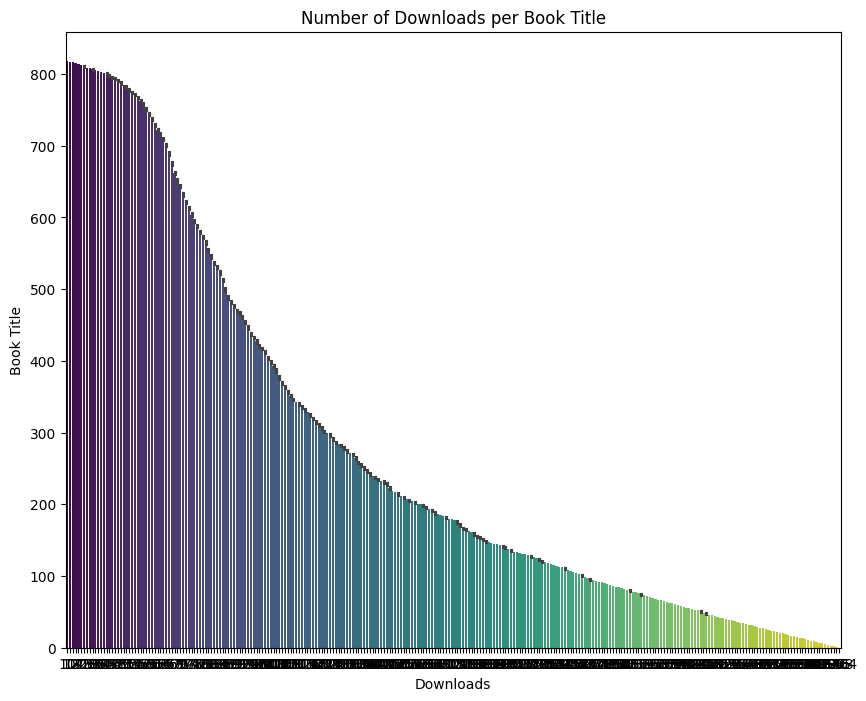

In [ ]:
# visualize number of download per book
plt.figure(figsize=(10, 8))
# printing the title of books made the chart unreadable, printing index instead
sns.barplot(x='Downloads', y=df.index, data=df.sort_values(by='Downloads', ascending=False), palette='viridis')
plt.title('Number of Downloads per Book Title')
plt.xlabel('Downloads')
plt.ylabel('Book Title')
plt.show()


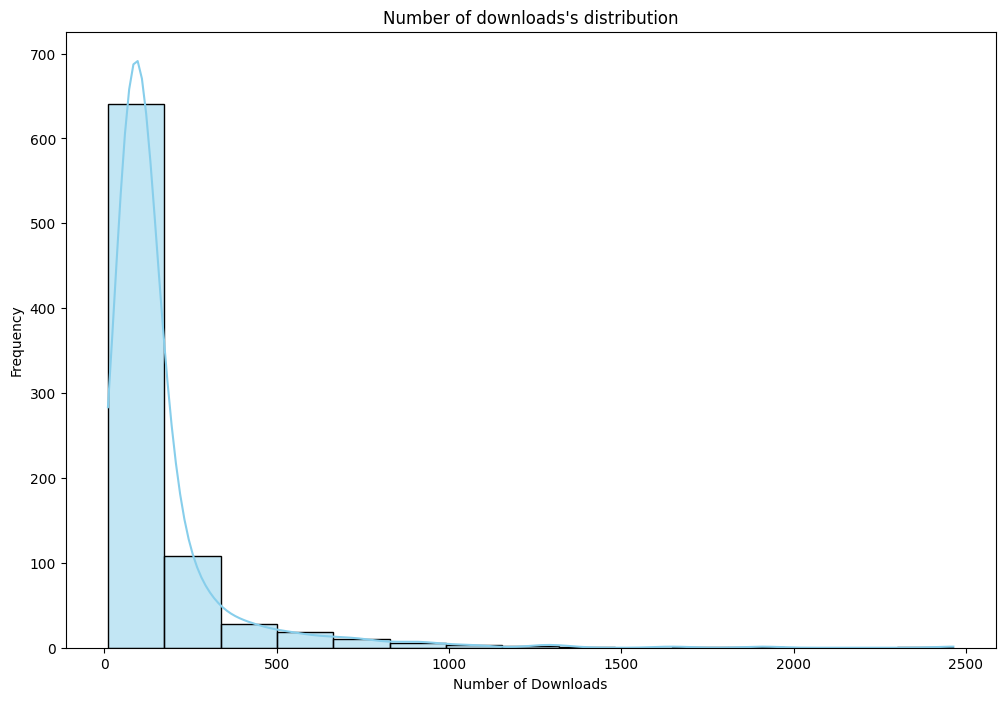

In [ ]:
# 2nd visualization, using binning
plt.figure(figsize=(12, 8))
sns.histplot(df['Downloads'], kde=True, bins=15, color='skyblue')
plt.title("Number of downloads's distribution")
plt.xlabel('Number of Downloads')
plt.ylabel('Frequency')
plt.show()
